# Detection des SPAMS

## Import des bibliothèques


In [3]:
#!python -m pip install wordcloud



In [1]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style("darkgrid")

import string
import nltk
from nltk.corpus import stopwords

from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn import metrics


## Import de la base 

In [2]:
messages = pd.read_csv("spam.csv", encoding="latin-1")
messages.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Analyse et traitement de données 

In [3]:
messages.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


**Supprimer les colonnes inutiles**

In [4]:
messages = messages.drop(labels= ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
messages.columns = ["label" , "message"]


**Informations**

In [5]:
messages.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
messages.groupby('label').describe().T

label                              ham  \
message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

label                                                        spam  
message count                                                 747  
        unique                                                653  
        top     Please call our customer service representativ...  
        freq                                                    4

**Afin d'analyser le dataset spam, on va créer une fonctionnalité pour détecter la longueur des messages textuels.**

In [9]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


**Compter la frequence des messages qui se repetent sur le dataset**

In [10]:
messages['message'].value_counts().rename_axis(['message']).reset_index(name='counts').head()

,message,counts
0,"Sorry, I'll call later",30
1,I cant pick the phone right now. Pls send a me...,12
2,Ok...,10
3,7 wonders in My WORLD 7th You 6th Ur style 5th...,4
4,"Say this slowly.? GOD,I LOVE YOU &amp; I NEED ...",4


**Visualiser le dataset**

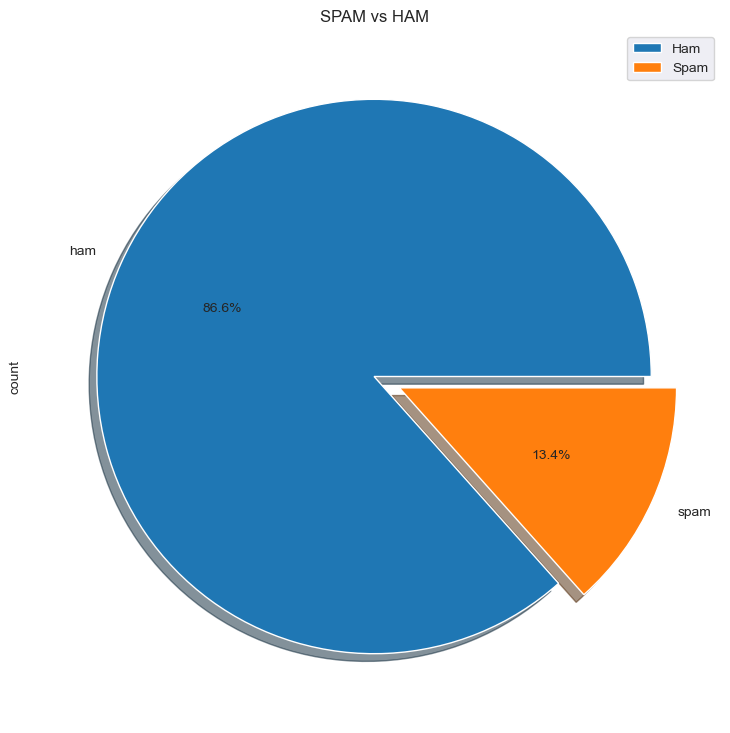

In [11]:
messages['label'].value_counts().plot(kind='pie',explode=[0,0.1],figsize=(9,9),autopct='%1.1f%%',shadow=True)
plt.title("SPAM vs HAM")
plt.legend(["Ham","Spam"])
plt.show()

Text(0, 0.5, 'fréquence')

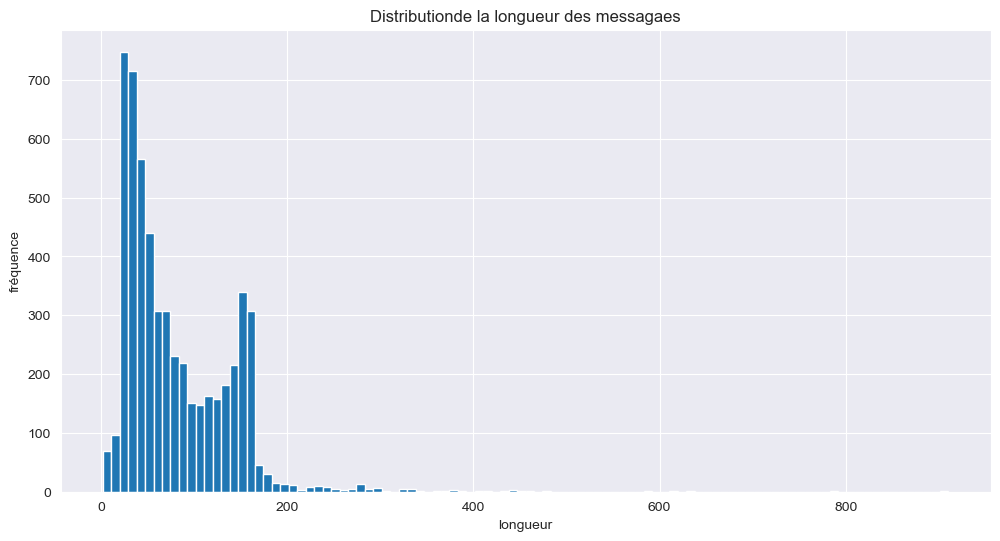

In [12]:
plt.figure(figsize=(12,6))
messages['length'].plot(bins=100,kind='hist')
plt.title('Distributionde la longueur des messagaes')
plt.xlabel("longueur")
plt.ylabel("fréquence")

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

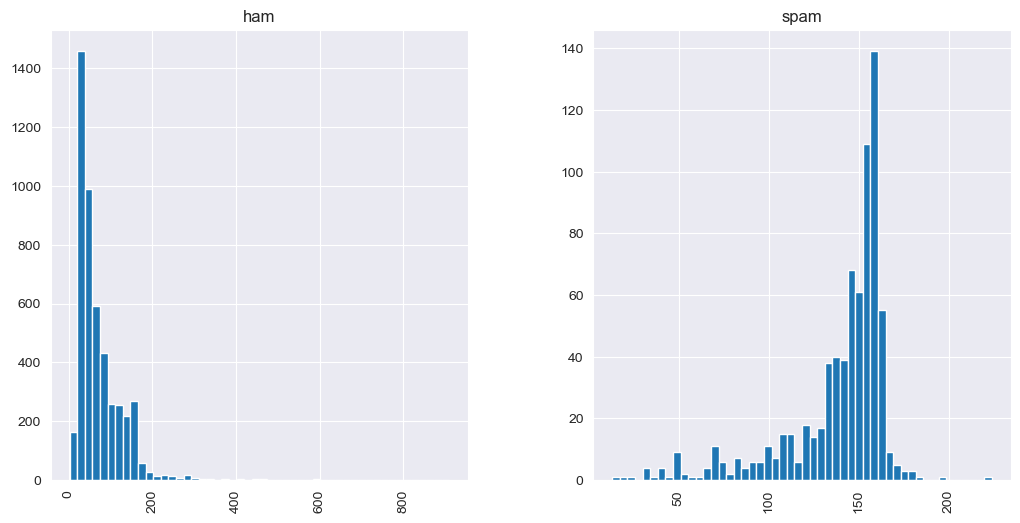

In [13]:
messages.hist(column='length', by='label', bins=50,figsize=(12,6))

Text(0.5, 0, 'Message Length')

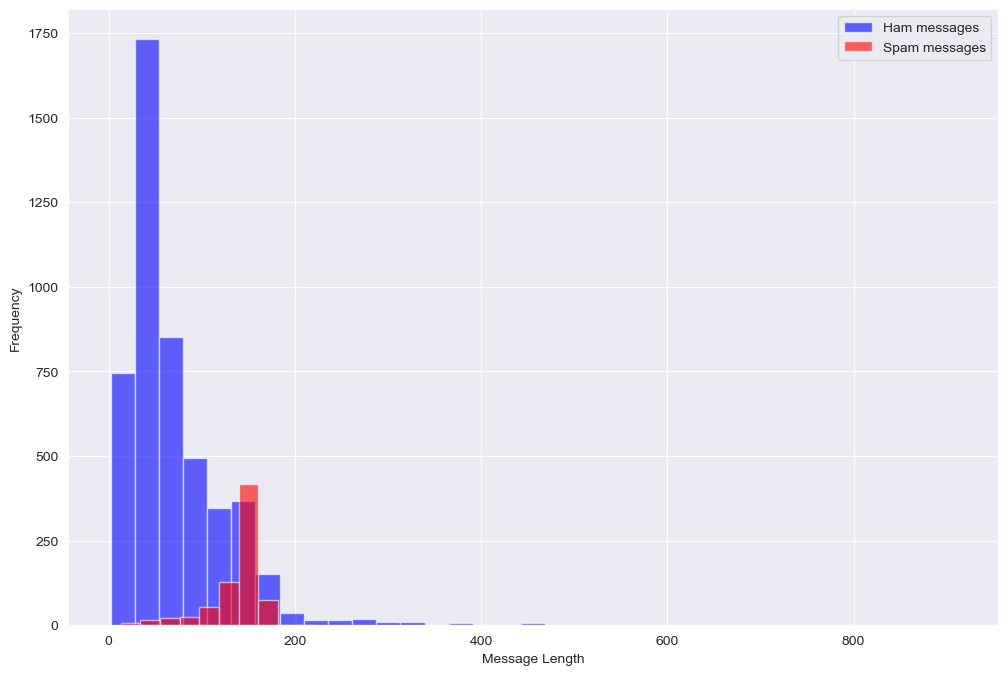

In [15]:
#representation de la longeur des messages par label
plt.figure(figsize=(12, 8))

messages[messages.label == 'ham'].length.plot(bins=35, kind='hist', color='blue',
                                        label='Ham messages', alpha=0.6)
messages[messages.label == 'spam'].length.plot(kind='hist', color='red',
                                        label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

In [16]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

Text(0.5, 0, 'Message Length')

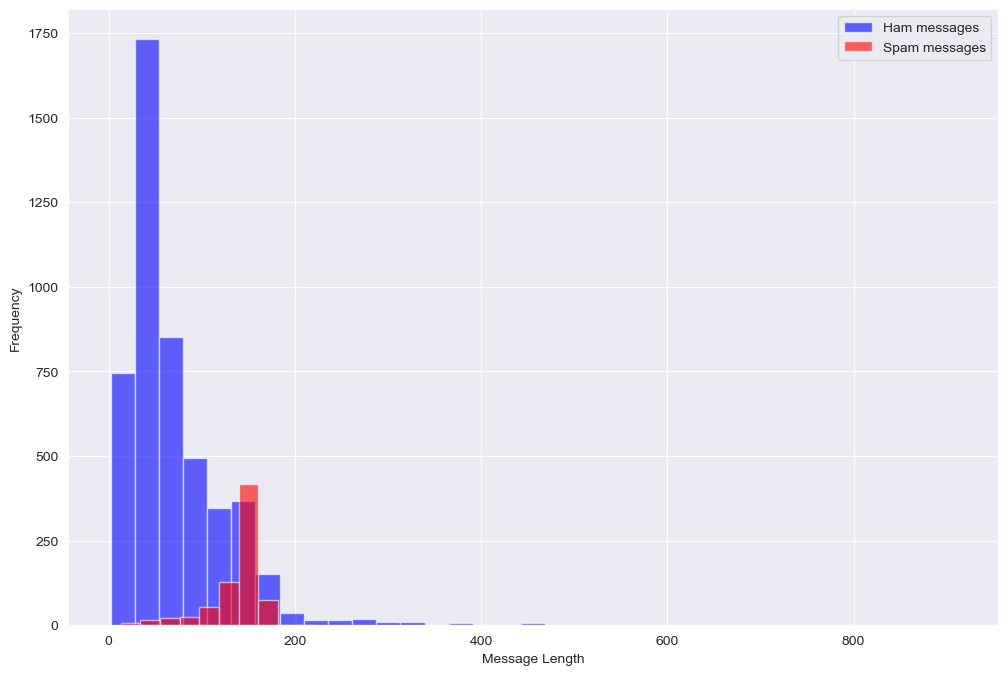

In [28]:
#representation de la longeur des messages par label
plt.figure(figsize=(12, 8))

messages[messages.label == 'ham'].length.plot(bins=35, kind='hist', color='blue',
                                        label='Ham messages', alpha=0.6)
messages[messages.label == 'spam'].length.plot(kind='hist', color='red',
                                        label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

In [17]:
def text_preprocess(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    nopunc = nopunc.lower()
    
    # Now just remove any stopwords and non alphabets
    nostop = [word for word in nopunc.split() if word.lower() not in stopwords.words('english') and word.isalpha()]
    return nostop

In [18]:
spam_messages = messages[messages["label"] == "spam"]["message"]
ham_messages = messages[messages["label"] == "ham"]["message"]
nltk.download('stopwords')
spam_words = text_preprocess(spam_messages)
ham_words = text_preprocess(ham_messages)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rymkm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


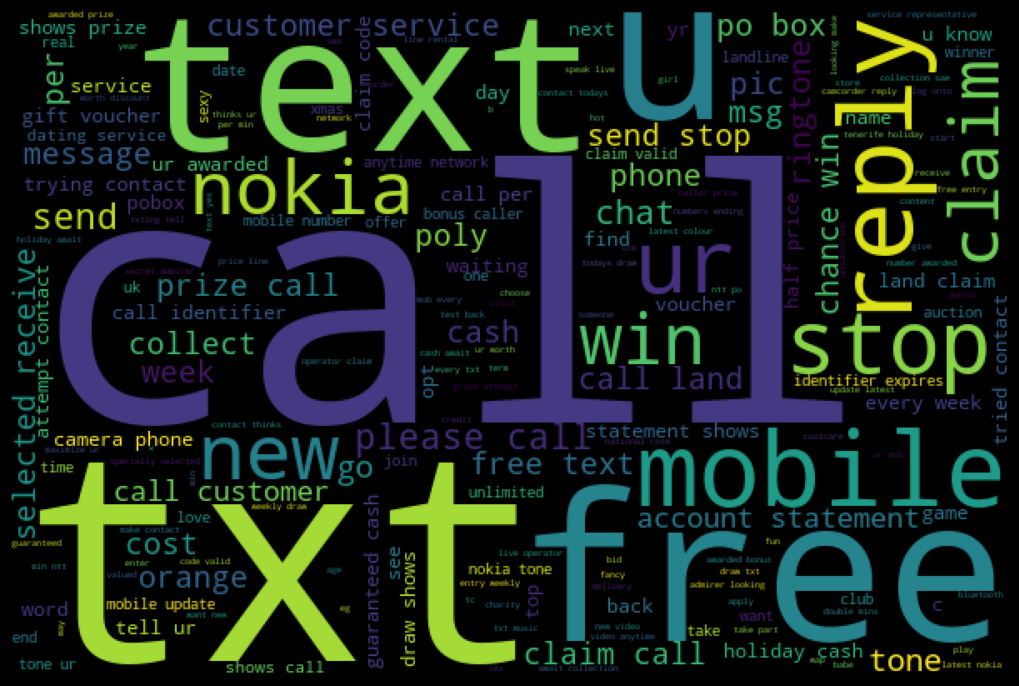

In [19]:
spam_wordcloud = WordCloud(width=600, height=400).generate(' '.join(spam_words))
plt.figure( figsize=(10,8), facecolor = 'k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

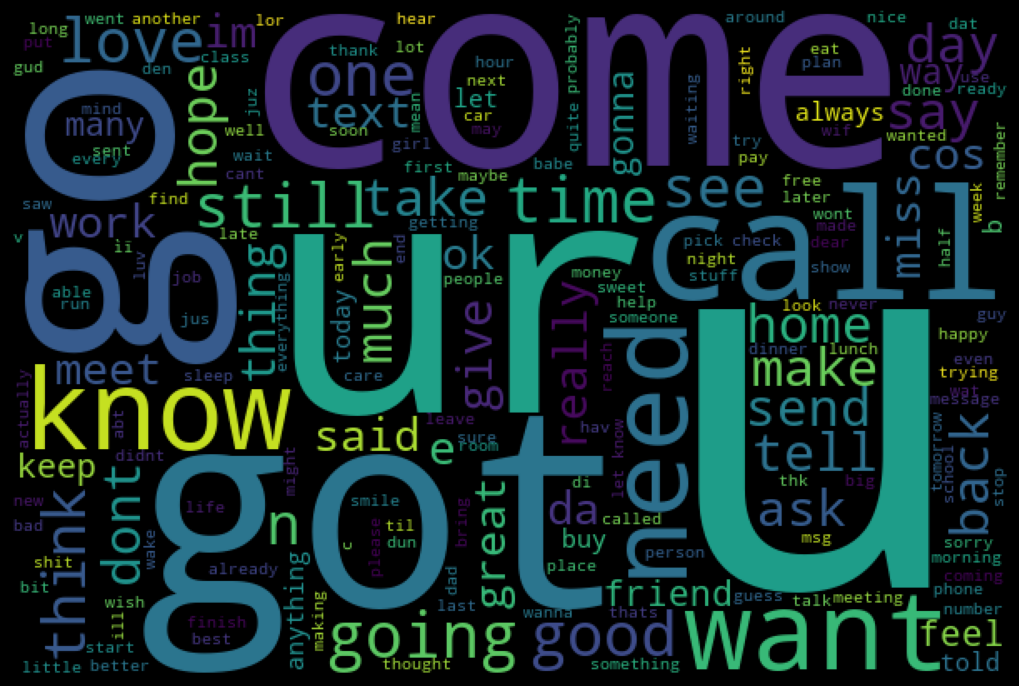

In [20]:
ham_wordcloud = WordCloud(width=600, height=400).generate(' '.join(ham_words))
plt.figure( figsize=(10,8), facecolor = 'k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [21]:
print(pd.Series(ham_words).value_counts().head(10))

u        820
get      287
ur       235
go       231
got      216
like     215
know     202
come     201
call     200
going    151
Name: count, dtype: int64


In [22]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
messages["message"]=messages["message"].apply(text_preprocess)

In [24]:
messages.head()

,label,message,length
0,ham,"[go, jurong, point, crazy, available, bugis, n...",111
1,ham,"[ok, lar, joking, wif, u, oni]",29
2,spam,"[free, entry, wkly, comp, win, fa, cup, final,...",155
3,ham,"[u, dun, say, early, hor, u, c, already, say]",49
4,ham,"[nah, dont, think, goes, usf, lives, around, t...",61


## calcul de la distance entre les phrases 
implique l'utilisation de gensim 

In [25]:
import gensim
from gensim.models import Word2Vec
import sklearn
from  sklearn.manifold import TSNE
import numpy as np

In [49]:
brutes = pd.read_csv("spam.csv", encoding="latin-1")
brutes = brutes["v2"]
brutes.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: v2, dtype: object

In [73]:
# Créer un fichier texte avec le nom de la colonne
with open("brutes.txt", "w", encoding="utf-8") as file:
# Parcourir chaque ligne de la colonne et écrire dans le fichier texte
    for content in brutes:
        file.write(f"['{content}'];")  # Écrire le contenu de la cellule suivie d'un ;

In [64]:
# Créer un fichier texte avec le nom de la colonne
with open("message.txt", "w", encoding="utf-8") as file:
# Parcourir chaque ligne de la colonne et écrire dans le fichier texte
    for content in messages:
        file.write(f"{content};")  # Écrire le contenu de la cellule suivie d'un ;

In [65]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize  import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
import spacy

nlp = spacy.load('en_core_web_sm')


In [71]:
def return_mean_embedding(sentence):
    # Tokeniser la phrase
    doc = nlp(sentence)
    # Retourner la moyenne des vecteurs pour chaque phrase
    return np.mean([(X.vector) for X in doc], axis=0)

In [72]:
# Calcul des embeddings moyens des données brutes
sentences_brut = pd.read_csv('brutes.txt', header=None, delimiter= ';',encoding='utf-8')
embedding_brut = sentences_brut[0].apply(return_mean_embedding)

# Calcul des embeddings moyens des données nettoyées
sentences_clean = pd.read_csv('message.txt', header=None, delimiter=';', encoding='utf-8')
embedding_clean = sentences_clean[0].apply(return_mean_embedding)

# Calcul de la norme de la différence (distance) entre les embeddings
norm_diff_2 = np.linalg.norm(embedding_brut - embedding_clean)
print("Norme de la différence entre les embeddings moyens :", norm_diff_2)



ParserError: Error tokenizing data. C error: Expected 110 fields in line 2, saw 3059


## **Import du model** 

On peut utiliser random forest, regression logistique, fasttext ...etc 

0    [go, jurong, point, crazy, available, bugis, n...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, wkly, comp, win, fa, cup, final,...
3        [u, dun, say, early, hor, u, c, already, say]
4    [nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [ ]:
x = messages
y = 

x_train, x_test, y_train, y_test = train_test_split()

## Exercice 

In [74]:
phrase_test = " La France est un pays Europeen" 

phrase_1 = "Paris est la Capitale de la France."
phrase_2 =  "On va passer les partiels durant la semaine prochaine."

In [80]:
def return_mean_embedding(sentence):
    # Tokeniser la phrase
    doc = nlp(sentence)
    # Retourner la moyenne des vecteurs pour chaque phrase
    return np.mean([(X.vector) for X in doc], axis=0)

# Calcul des embeddings pour chaque phrase
embedding_test = return_mean_embedding(phrase_test)
embedding_test_2 = return_mean_embedding(phrase_1)
embedding_test_3 = return_mean_embedding(phrase_2)


# Calcul de la norme de la différence entre les embeddings
norm_diff_2 = np.linalg.norm(embedding_test - embedding_test_2)
norm_diff_3 = np.linalg.norm(embedding_test - embedding_test_3)


# Affichage des résultats
print("Norme de la similarité entre test et test_2:", norm_diff_2)
print("Norme de la similarité entre test et test_3:", norm_diff_3)



Norme de la similarité entre test et test_2: 4.030098
Norme de la similarité entre test et test_3: 3.9469042


In [81]:
#afficher les tokens
token = text_preprocess(phrase_1)
token

['paris', 'est', 'la', 'capitale', 'de', 'la', 'france']